# 6. Figures

## Import Packages

In [1]:
import sys

sys.path.append("../../")
sys.path.append('../../src')

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import random
import matplotlib.pyplot as plt

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.nn.Fitter1D.Fitter1D import Multiscale1DFitter, Model
from m3_learning.nn.Fitter1D.Fitter1D import ComplexPostProcessor
from m3_learning.viz.layout import (
    inset_connector,
    add_box,
    labelfigs
)
import m3_learning

from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data

In [3]:
# Specify the filename and the path to save the file
filename = "./data_raw_unmod.h5"
save_path = "./Data"

data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, SHO_fit_func_LSQF=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
   

## Figure 1

In [4]:
# instantiates the visualization object
BE_viz = Viz(dataset, printing, verbose=True)

/home/alk224/miniconda3/envs/alibek/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


./Figures/Figure_2_raw_be_experiment.png
./Figures/Figure_2_raw_be_experiment.svg


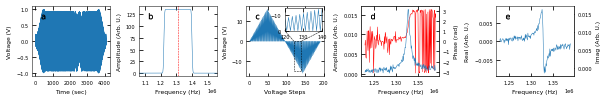

In [5]:
fig = BE_viz.raw_be(dataset, filename="Figure_2_raw_be_experiment")

In [6]:
axes = fig.axes
axes

[<Axes: xlabel='Time (sec)', ylabel='Voltage (V)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)'>,
 <Axes: xlabel='Voltage Steps', ylabel='Voltage (V)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Real (Arb. U.)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Phase (rad)'>,
 <Axes: xlabel='Frequency (Hz)', ylabel='Imag (Arb. U.)'>]

/home/alk224/miniconda3/envs/alibek/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values


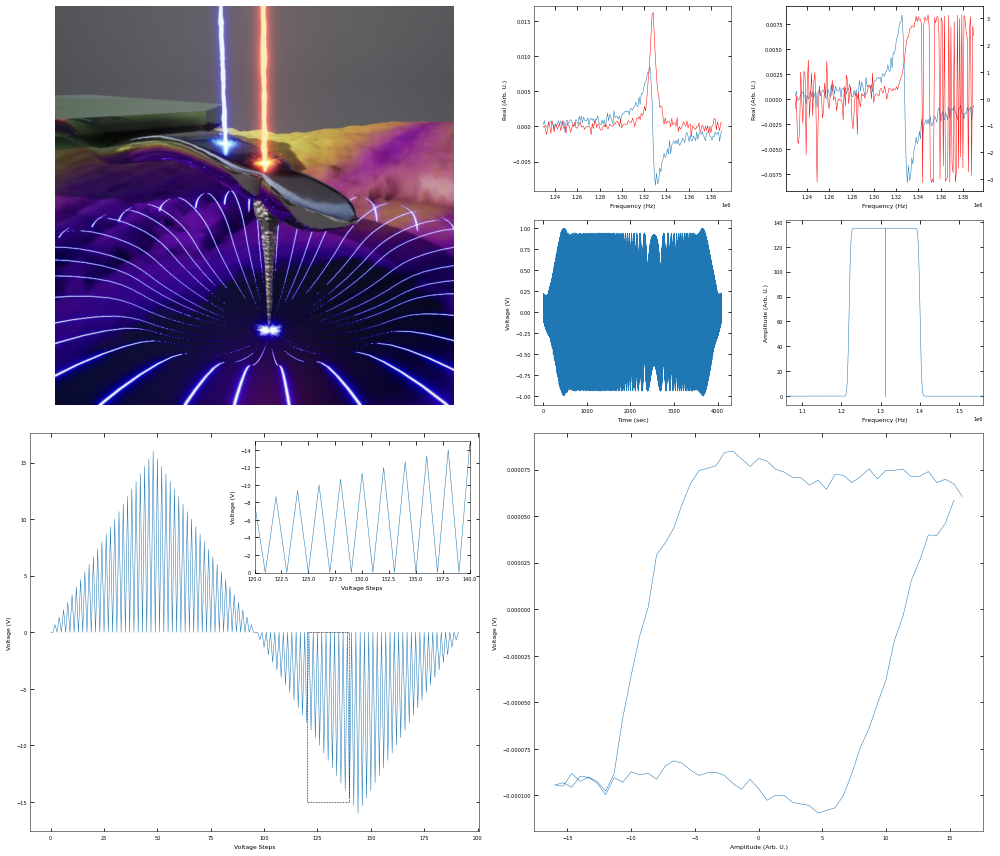

In [7]:
def copy_axes_properties(source_ax, target_ax, secondary_ax=None, type_ax=None):
    """Copy properties and data from source_ax to target_ax."""
    target_ax.set_xlabel(source_ax.get_xlabel())
    target_ax.set_ylabel(source_ax.get_ylabel())
    target_ax.set_xlim(source_ax.get_xlim())
    target_ax.set_ylim(source_ax.get_ylim())
        
    for line in source_ax.get_lines():
        target_ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        
    if secondary_ax != None:
        if type_ax == 'twin':
            ax_twin = target_ax.twinx()
            for line in secondary_ax.get_lines():
                ax_twin.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        elif type_ax == 'same':
            for line in secondary_ax.get_lines():
                target_ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
                
                max_x_lim = max(source_ax.get_xlim()[1], secondary_ax.get_xlim()[1])
                min_x_lim = min(source_ax.get_xlim()[0], secondary_ax.get_xlim()[0])
                max_y_lim = max(source_ax.get_ylim()[1], secondary_ax.get_ylim()[1])
                min_y_lim = min(source_ax.get_ylim()[0], secondary_ax.get_ylim()[0])
                target_ax.set_xlim((min_x_lim, max_x_lim))
                target_ax.set_ylim((min_y_lim, max_y_lim))
        else:
            ax_new = target_ax.inset_axes([0.5, 0.65, 0.48, 0.33])
            x_start = 120
            x_end = 140
            ax_new.plot(dataset.hysteresis_waveform)
            ax_new.set_xlim(x_start, x_end)
            ax_new.set_ylim(0, -15)

            # drows the inset connector
            inset_connector(
                source_ax,
                target_ax,
                ax_new,
                [(x_start, 0), (x_end, 0)],
                [(x_start, 0), (x_end, 0)],
                color="k",
                linestyle="--",
                linewidth=0.5,
            )

            # adds a box on the figure
            add_box(
                target_ax,
                (x_start, 0, x_end, -15),
                edgecolor="k",
                linestyle="--",
                facecolor="none",
                linewidth=0.5,
                zorder=10,
            )
            ax_new.set_xlabel("Voltage Steps")
            ax_new.set_ylabel("Voltage (V)")

# Create a figure
fig = plt.figure(figsize=(14, 12))

# Define the GridSpec layout
gs = GridSpec(4, 4, figure=fig)

order = [['AFM'], [1], [0], [4, 'same', 6], [4, 'twin', 5], [2, 'inset', 3], ['hysteresis_loop']]

# List of axes indices in GridSpec for each subplot
subplot_specs = [(0, 2, 0, 2), # a (3D AFM)
                 (1, 2, 3, 4), # b (resonance frequency)
                 (1, 2, 2, 3), # c (waveform)
                 (0, 1, 2, 3), # d (real/imag)
                 (0, 1, 3, 4), # e (amp/phase)
                 (2, 4, 0, 2), # f (triangular waveform)
                 (2, 4, 2, 4)] # g (hysteresis)

# Create and set up subplots
for i, (r_start, r_end, c_start, c_end) in enumerate(subplot_specs):
    ax = fig.add_subplot(gs[r_start:r_end, c_start:c_end])
    if i < len(axes):
        idx = order[i]
        if idx[0] == 'AFM':
            image_path = "./Figures/AFM_tip_3D.jpeg"
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')  # Turn off axis for image subplot
        elif idx[0] == 'hysteresis_loop':
            raw_hysteresis_loop, voltage = dataset.get_hysteresis(
                                loop_interpolated=True, plotting_values=True)
            row = random.randint(0, 59)
            col = random.randint(0, 59)
            cycle = random.randint(0, 3)
            ax.plot(voltage.squeeze()*-1,
                       raw_hysteresis_loop[row, col, cycle, :].squeeze())
            ax.set_xlabel("Amplitude (Arb. U.)")
            ax.set_ylabel("Voltage (V)")
        elif len(idx) == 1:
            copy_axes_properties(axes[idx[0]], ax)
        else:
            copy_axes_properties(axes[idx[0]], ax, axes[idx[2]], idx[1])
            

# Adjust the spacing between the plots as needed
plt.tight_layout()

# Show the layout
plt.show()

**Figure 1**: Schematic diagram of band-excitation piezoresponse force microscopy switching spectroscopy (BE-SS) **a** Artistic render of an AFM tip applying an electric field to the surface. **b** Band
of excited frequencies excited. The dashed line shows the cantilever resonance frequency. **c** Bandexcitation waveform used to excite the cantilever in time domain **d** Fast Fourier transform of a
single-cantilever resonance during band-excitation piezoresponse force microscopy – shown as real
and imaginary components. **e** Magnitude spectrum showing the amplitude and the phase of cantilever
resonance. **f** Bipolar-triangular waveform used to switch the ferroelectric. The inset shows where the
band-excitation waveform was applied in both the voltage-on and voltage-off states. **g** Example of a
typical piezoelectric hysteresis loop obtained during BE-SS.

## Figure 3

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU A100-SXM4-40GB

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


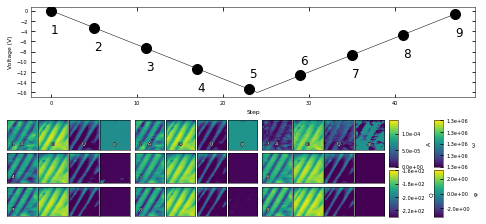

In [8]:
random_seed(seed=42)

postprocessor = ComplexPostProcessor(dataset)

model_ = Multiscale1DFitter(SHO_fit_func_nn, # function 
                            dataset.frequency_bin, # x data
                            2, # input channels
                            4, # output channels
                            dataset.SHO_scaler, 
                            postprocessor)

# instantiate the model
model = Model(model_, dataset, training=False, model_basename="SHO_Fitter_original_data")

model.load(
    "./Trained Models/SHO Fitter/SHO_Fitter_original_data_model_optimizer_Adam_epoch_4_train_loss_0.03404089391780737.pth"
)

# model.load_state_dict(torch.load("./Trained Models/SHO Fitter/SHO_Fitter_original_data_model_optimizer_Trust Region CG_epoch_599_train_loss_0.005903387442231178.pth"))

X_data, Y_data = dataset.NN_data()

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

fig = BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")

In [9]:
axes = fig.axes

./Figures/Figure_16_Violin.png
./Figures/Figure_16_Violin.svg


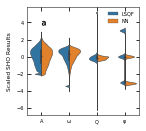

In [10]:
true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}


fig = BE_viz.violin_plot_comparison(true_state, model, X_data, filename="Figure_16_Violin") 

In [11]:
axes.extend(fig.axes)


        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
        Measurement State = all
        Resample Resampled = True
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = 1.5707963267948966
        Noise Level = 0
        loop interpolated = False
                    
None

        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
        Measurement State = all
        Resample Resampled = True
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = 1.5707963267948966
        Noise Level = 0
        loop interpolated = False
                    
None

        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
  

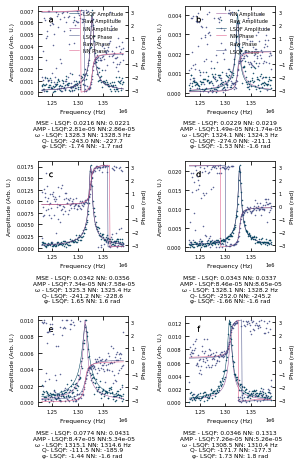

In [12]:
# sets the phase shift of the dataset
dataset.NN_phase_shift = np.pi/2
dataset.LSQF_phase_shift = np.pi/2
dataset.measurement_state = "all"

# sets the true state which to compare the results.
true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}

# sets the state of the output data
out_state = {"scaled": True, "raw_format": "magnitude spectrum"}

# sets the number of examples to get
n = 1

LSQF = BE_viz.get_best_median_worst(
    true_state,
    prediction={"fitter": "LSQF"},
    out_state=out_state,
    SHO_results=True,
    n=n,
)

NN = BE_viz.get_best_median_worst(
    true_state, prediction=model, out_state=out_state, SHO_results=True, n=n
)

data = (LSQF, NN)
names = ["LSQF", "NN"]

fig = BE_viz.SHO_Fit_comparison(
    data,
    names,
    model_comparison=[model, {"fitter": "LSQF"}],
    out_state=out_state,
    filename="Figure_14_LSQF_NN_bmw_comparison",
    # display_results = None
)

In [13]:
axes.extend(fig.axes)

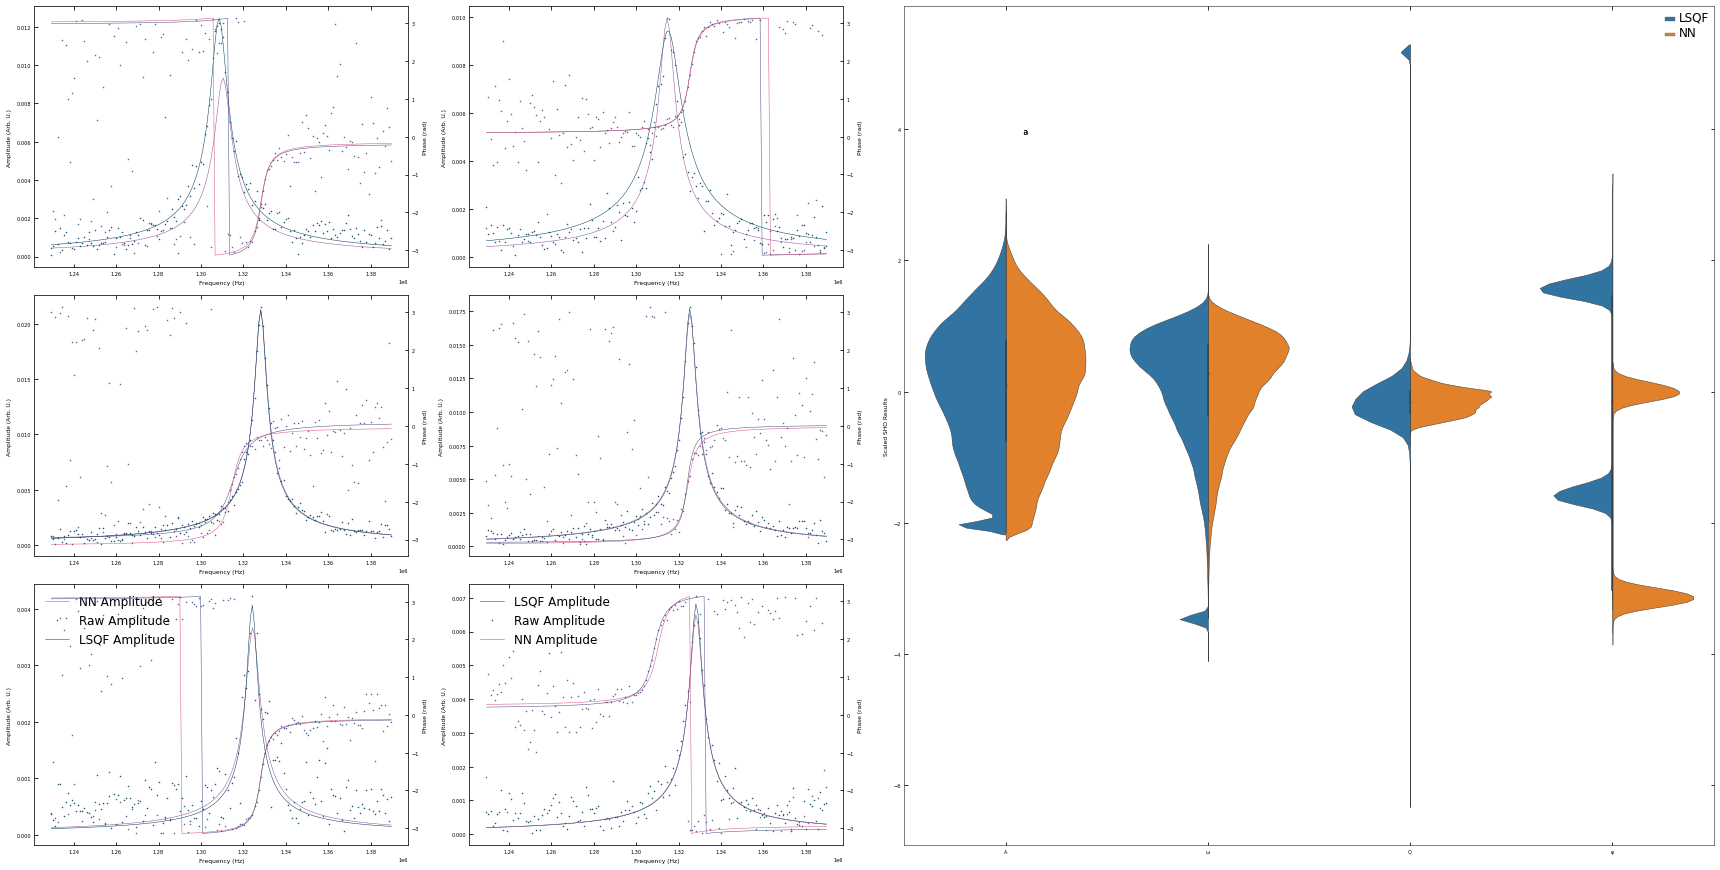

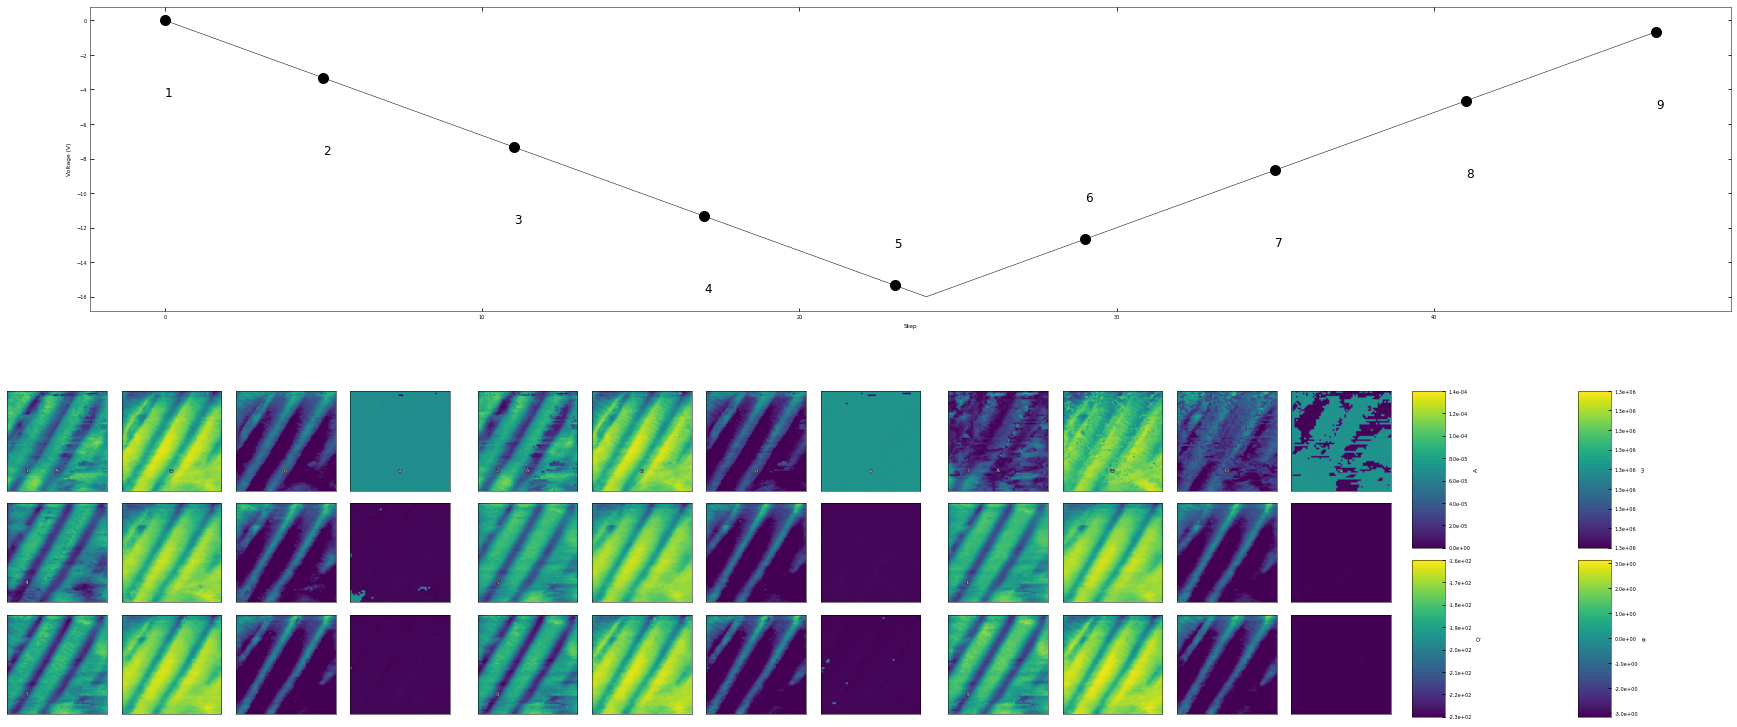

In [14]:
import pandas as pd
import seaborn as sns
import itertools

def copy_axes_properties(source_ax, target_ax, secondary_ax=None, type_ax=None):
    """Copy properties and data from source_ax to target_ax."""
    # Copy basic properties
    target_ax.set_xlabel(source_ax.get_xlabel())
    target_ax.set_ylabel(source_ax.get_ylabel())
    target_ax.set_xlim(source_ax.get_xlim())
    target_ax.set_ylim(source_ax.get_ylim())
    target_ax.set_title(source_ax.get_title())

    # Copy lines from the primary axis
    for line in source_ax.get_lines():
        label = line.get_label() if line.get_label() != '_nolegend_' else None
        # Copying line properties like color, linestyle, marker, etc.
        target_ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(),
                       linestyle=line.get_linestyle(), marker=line.get_marker(), label=label)

    # Handle twin axes if present
    if secondary_ax:
        ax_twin = target_ax.twinx()
        ax_twin.set_ylim(secondary_ax.get_ylim())
        ax_twin.set_ylabel(secondary_ax.get_ylabel())

        for line in secondary_ax.get_lines():
            label = line.get_label() if line.get_label() != '_nolegend_' else None
            # Copying line properties for the twin axis
            ax_twin.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(),
                         linestyle=line.get_linestyle(), marker=line.get_marker(), label=label)

    # Copy legends
    if source_ax.get_legend():
        target_ax.legend(fontsize='large')

    if secondary_ax and secondary_ax.get_legend():
        ax_twin.legend(fontsize='large')

# Create a figure
fig = plt.figure(figsize=(24, 24))

# Define the GridSpec layout
gs = GridSpec(6, 4, figure=fig)

order = [[42, 'twin', 48],
         [43, 'twin', 49],
         [44, 'twin', 50],
         [45, 'twin', 51],
         [46, 'twin', 52],
         [47, 'twin', 53],
         ['violin'],
        ]

# List of axes indices in GridSpec for each subplot
subplot_specs = [(0, 1, 0, 1), # a
                 (0, 1, 1, 2), # b
                 (1, 2, 0, 1), # c
                 (1, 2, 1, 2), # d
                 (2, 3, 0, 1), # e
                 (2, 3, 1, 2), # f
                 (0, 3, 2, 6), # g
                ]

# Create and set up subplots
for i, (r_start, r_end, c_start, c_end) in enumerate(subplot_specs):
    ax = fig.add_subplot(gs[r_start:r_end, c_start:c_end])
    if i < len(axes):
        idx = order[i]
        if idx[0] == 'violin':
            df = pd.DataFrame()

            # scales the parameters
            scaled_param = dataset.SHO_scaler.transform(parm)

            # gets the parameters from the SHO LSQF fit
            true = dataset.SHO_fit_results().reshape(-1, 4)

            # Builds the dataframe for the violin plot
            true_df = pd.DataFrame(
                true, columns=["Amplitude", "Resonance", "Q-Factor", "Phase"]
            )
            predicted_df = pd.DataFrame(
                scaled_param, columns=["Amplitude",
                                       "Resonance", "Q-Factor", "Phase"]
            )

            # merges the two dataframes
            df = pd.concat((true_df, predicted_df))

            # adds the labels to the dataframe
            names = [true, scaled_param]
            names_str = ["LSQF", "NN"]
            labels = ["A", "\u03C9", "Q", "\u03C6"]

            # adds the labels to the dataframe
            for j, name in enumerate(names):
                for i, label in enumerate(labels):
                    dict_ = {
                        "value": name[:, i],
                        "parameter": np.repeat(label, name.shape[0]),
                        "dataset": np.repeat(names_str[j], name.shape[0]),
                    }

                    df = pd.concat((df, pd.DataFrame(dict_)))

            # plots the data
            sns.violinplot(
                data=df, x="parameter", y="value", hue="dataset", split=True, ax=ax
            )

            # labels the figure and does some styling
            labelfigs(ax, 0, style="b")
            ax.set_ylabel("Scaled SHO Results")
            ax.set_xlabel("")

            # Get the legend associated with the plot
            legend = ax.get_legend()
            legend.set_title("")
            plt.setp(legend.get_texts(), fontsize='large') # Set the label size
        else:
            copy_axes_properties(axes[idx[0]], ax, axes[idx[2]], idx[1])
            

# Adjust the spacing between the plots as needed
plt.tight_layout()

# Show the layout
plt.show()

fig = BE_viz.SHO_switching_maps(parm);

# Set the figure size with 24 inches width
fig.set_size_inches(24, 10, forward=True)

# Show the layout
fig.show()

Figure 3. SHO fitting results of DNN in comparison with LSQF method’s results. a,c,e Best, median and worst predictions of LSQF method. b,d,f Best, median and worst predictions of neural network trained with ADAHESSIAN. g Distributions of predicted parameters. h Band-excitation waveform with switching voltage comparing maps of four parameters (i-q) predicted by NN and LSQF

## Figure 4

In [15]:
h5_loop_fit, h5_loop_group = dataset.LSQF_Loop_Fit()

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (11 members)>]

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000" (11 members)>]
Returned previously computed results at /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_0

/home/alk224/miniconda3/envs/alibek/lib/python3.9/site-packages/pyUSID/io/hdf_utils/simple.py:888: UserWarning: A dataset named: Guess_Loop_Parameters already exists in group: /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))
/home/alk224/miniconda3/envs/alibek/lib/python3.9/site-packages/pyUSID/io/hdf_utils/simple.py:888: UserWarning: A dataset named: Fit_Loop_Parameters already exists in group: /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Fit-Loop_Fit_000
  warn('A dataset named: {} already exists in group: {}'.format(dset_name, h5_group.name))


In [16]:
# instantiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

# instantiate the dataset object
dataset = BE_Dataset(data_path)

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 300), (-np.pi, np.pi)], 
             image_scalebar = image_scalebar)

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values


In [25]:
from m3_learning.be.loop_fitter import loop_fitting_function_torch
from m3_learning.optimizers.TrustRegion import TRCG
import torch.optim as optim


data, voltage = dataset.get_hysteresis(scaled=True, loop_interpolated = True)
# V = np.swapaxes(np.atleast_2d(dataset.get_voltage), 0, 1).astype(np.float64)


model_ = Multiscale1DFitter(loop_fitting_function_torch, # function 
                            voltage[:,0].squeeze(), # x data
#                             V.squeeze(),
                            1, # input channels
                            9, # output parameters
                            dataset.loop_param_scaler,
                            loops_scaler=dataset.hysteresis_scaler)

# instantiate the model
model = Model(model_, dataset, training=True, model_basename="SHO_Fitter_original_data")

from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(data.reshape(-1,96), test_size=0.2, random_state=42, shuffle=True)

X_train = np.atleast_3d(X_train)

optimizer = {
    "name": "TRCG", 
    "optimizer": TRCG,
    "closure_size": 1,
    "cgopttol": 1e-3,
    "c0tr": 0.2,
    "c1tr": 0.25,
    "c2tr": 0.75,
    "t1tr": 0.75,
    "t2tr": 2.0,
    "radius_max": 5.0,  
    "radius_initial": 1.0,
    "radius" : 1.0,
    "device": "cuda",
    "ADAM_epochs": 100}


train = True

if train:
    # fits the model
    model.fit(
        X_train,
        1024,
        optimizer=optimizer,
        epochs = 500,
    )
else:
    model.load(
        "./Trained Models/SHO Fitter/SHO_Fitter_original_data_model_epoch_5_train_loss_0.0449272525189978.pth"
    )

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
Using GPU A100-SXM4-40GB
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Adam
epoch : 1/500, recon loss = 0.16529984
--- 0.12391376495361328 seconds ---
Epoch 1, Learning Rate: 0.001
Adam
epoch : 2/500, recon loss = 0.13210564
--- 0.1157081127166748 seconds ---
Epoch 2, Learning Rate: 0.001
Adam
epoch : 3/500, recon loss = 0.09515618
--- 0.11490178108215332 seconds ---
Epoch 3, Learning Rate: 0.001
Adam
epoch : 4/500, recon loss = 0.07342229
--- 0.11483263969421387 seconds ---
Epoch 4, Learning Rate: 0.001
Adam
epoch : 5/500, recon loss = 0.06299723
--- 0.11422038078308105 seconds ---
Epoch 5, Learning Rate: 0.001
Adam
epoch : 6/500, recon loss = 0.05499921
--- 0.5262787342071533 seconds ---
Epoch 6, Learning Rate: 0.001
Adam
epoch : 7/500, recon loss = 0.0

Adam
epoch : 73/500, recon loss = 0.01871246
--- 0.11578869819641113 seconds ---
Epoch 73, Learning Rate: 0.001
Adam
epoch : 74/500, recon loss = 0.01865964
--- 0.11549186706542969 seconds ---
Epoch 74, Learning Rate: 0.001
Adam
epoch : 75/500, recon loss = 0.01862074
--- 0.11585164070129395 seconds ---
Epoch 75, Learning Rate: 0.001
Adam
epoch : 76/500, recon loss = 0.01856612
--- 0.11623954772949219 seconds ---
Epoch 76, Learning Rate: 0.001
Adam
epoch : 77/500, recon loss = 0.01852599
--- 0.11571478843688965 seconds ---
Epoch 77, Learning Rate: 0.001
Adam
epoch : 78/500, recon loss = 0.01848755
--- 0.11488723754882812 seconds ---
Epoch 78, Learning Rate: 0.001
Adam
epoch : 79/500, recon loss = 0.01844443
--- 0.11548924446105957 seconds ---
Epoch 79, Learning Rate: 0.001
Adam
epoch : 80/500, recon loss = 0.01840411
--- 0.1152181625366211 seconds ---
Epoch 80, Learning Rate: 0.001
Adam
epoch : 81/500, recon loss = 0.01836664
--- 0.11601519584655762 seconds ---
Epoch 81, Learning Rate:

Trust Region CG
epoch : 143/500, recon loss = 0.00989969
--- 2.816112756729126 seconds ---
Epoch 143, Learning Rate: 0.001
Trust Region CG
epoch : 144/500, recon loss = 0.00977360
--- 2.64654278755188 seconds ---
Epoch 144, Learning Rate: 0.001
Trust Region CG
epoch : 145/500, recon loss = 0.00976521
--- 3.179655075073242 seconds ---
Epoch 145, Learning Rate: 0.001
Trust Region CG
epoch : 146/500, recon loss = 0.00988583
--- 2.843888282775879 seconds ---
Epoch 146, Learning Rate: 0.001
Trust Region CG
epoch : 147/500, recon loss = 0.00964541
--- 2.000565767288208 seconds ---
Epoch 147, Learning Rate: 0.001
Trust Region CG
epoch : 148/500, recon loss = 0.00943278
--- 3.649048089981079 seconds ---
Epoch 148, Learning Rate: 0.001
Trust Region CG
epoch : 149/500, recon loss = 0.01048678
--- 4.1025848388671875 seconds ---
Epoch 149, Learning Rate: 0.001
Trust Region CG
epoch : 150/500, recon loss = 0.00945264
--- 3.023893356323242 seconds ---
Epoch 150, Learning Rate: 0.001
Trust Region CG


Trust Region CG
epoch : 210/500, recon loss = 0.00800255
--- 1.8019676208496094 seconds ---
Epoch 210, Learning Rate: 0.001
Trust Region CG
epoch : 211/500, recon loss = 0.00798996
--- 2.5468099117279053 seconds ---
Epoch 211, Learning Rate: 0.001
Trust Region CG
epoch : 212/500, recon loss = 0.00791251
--- 1.7970175743103027 seconds ---
Epoch 212, Learning Rate: 0.001
Trust Region CG
epoch : 213/500, recon loss = 0.00811227
--- 2.9084436893463135 seconds ---
Epoch 213, Learning Rate: 0.001
Trust Region CG
epoch : 214/500, recon loss = 0.00813251
--- 1.9744701385498047 seconds ---
Epoch 214, Learning Rate: 0.001
Trust Region CG
epoch : 215/500, recon loss = 0.00806170
--- 3.4804811477661133 seconds ---
Epoch 215, Learning Rate: 0.001
Trust Region CG
epoch : 216/500, recon loss = 0.00808438
--- 2.662738084793091 seconds ---
Epoch 216, Learning Rate: 0.001
Trust Region CG
epoch : 217/500, recon loss = 0.00799577
--- 2.6646885871887207 seconds ---
Epoch 217, Learning Rate: 0.001
Trust Reg

Trust Region CG
epoch : 277/500, recon loss = 0.00749741
--- 1.666696548461914 seconds ---
Epoch 277, Learning Rate: 0.001
Trust Region CG
epoch : 278/500, recon loss = 0.00773930
--- 2.9280128479003906 seconds ---
Epoch 278, Learning Rate: 0.001
Trust Region CG
epoch : 279/500, recon loss = 0.01145819
--- 2.3163959980010986 seconds ---
Epoch 279, Learning Rate: 0.001
Trust Region CG
epoch : 280/500, recon loss = 0.00894165
--- 1.564915418624878 seconds ---
Epoch 280, Learning Rate: 0.001
Trust Region CG
epoch : 281/500, recon loss = 0.00770821
--- 1.6061835289001465 seconds ---
Epoch 281, Learning Rate: 0.001
Trust Region CG
epoch : 282/500, recon loss = 0.00752606
--- 1.667583703994751 seconds ---
Epoch 282, Learning Rate: 0.001
Trust Region CG
epoch : 283/500, recon loss = 0.00736745
--- 1.522057294845581 seconds ---
Epoch 283, Learning Rate: 0.001
Trust Region CG
epoch : 284/500, recon loss = 0.00745733
--- 2.2526516914367676 seconds ---
Epoch 284, Learning Rate: 0.001
Trust Region

Trust Region CG
epoch : 344/500, recon loss = 0.00711132
--- 3.903801918029785 seconds ---
Epoch 344, Learning Rate: 0.001
Trust Region CG
epoch : 345/500, recon loss = 0.00712609
--- 2.1883785724639893 seconds ---
Epoch 345, Learning Rate: 0.001
Trust Region CG
epoch : 346/500, recon loss = 0.00711238
--- 2.862861156463623 seconds ---
Epoch 346, Learning Rate: 0.001
Trust Region CG
epoch : 347/500, recon loss = 0.00711589
--- 2.0507571697235107 seconds ---
Epoch 347, Learning Rate: 0.001
Trust Region CG
epoch : 348/500, recon loss = 0.00714228
--- 2.5487070083618164 seconds ---
Epoch 348, Learning Rate: 0.001
Trust Region CG
epoch : 349/500, recon loss = 0.00712499
--- 2.9254631996154785 seconds ---
Epoch 349, Learning Rate: 0.001
Trust Region CG
epoch : 350/500, recon loss = 0.00711457
--- 2.438053846359253 seconds ---
Epoch 350, Learning Rate: 0.001
Trust Region CG
epoch : 351/500, recon loss = 0.00713697
--- 2.5157270431518555 seconds ---
Epoch 351, Learning Rate: 0.001
Trust Regio

Trust Region CG
epoch : 411/500, recon loss = 0.00702112
--- 2.283690929412842 seconds ---
Epoch 411, Learning Rate: 0.001
Trust Region CG
epoch : 412/500, recon loss = 0.00701016
--- 2.1726317405700684 seconds ---
Epoch 412, Learning Rate: 0.001
Trust Region CG
epoch : 413/500, recon loss = 0.00700916
--- 2.8939359188079834 seconds ---
Epoch 413, Learning Rate: 0.001
Trust Region CG
epoch : 414/500, recon loss = 0.00700355
--- 2.997260332107544 seconds ---
Epoch 414, Learning Rate: 0.001
Trust Region CG
epoch : 415/500, recon loss = 0.00700487
--- 3.089200019836426 seconds ---
Epoch 415, Learning Rate: 0.001
Trust Region CG
epoch : 416/500, recon loss = 0.00701623
--- 2.976116895675659 seconds ---
Epoch 416, Learning Rate: 0.001
Trust Region CG
epoch : 417/500, recon loss = 0.00699711
--- 2.7632827758789062 seconds ---
Epoch 417, Learning Rate: 0.001
Trust Region CG
epoch : 418/500, recon loss = 0.00700784
--- 2.383910894393921 seconds ---
Epoch 418, Learning Rate: 0.001
Trust Region 

Trust Region CG
epoch : 478/500, recon loss = 0.00678779
--- 4.547194957733154 seconds ---
Epoch 478, Learning Rate: 0.001
Trust Region CG
epoch : 479/500, recon loss = 0.00680826
--- 2.8835973739624023 seconds ---
Epoch 479, Learning Rate: 0.001
Trust Region CG
epoch : 480/500, recon loss = 0.00681011
--- 2.1828818321228027 seconds ---
Epoch 480, Learning Rate: 0.001
Trust Region CG
epoch : 481/500, recon loss = 0.00678200
--- 2.7597780227661133 seconds ---
Epoch 481, Learning Rate: 0.001
Trust Region CG
epoch : 482/500, recon loss = 0.00676934
--- 2.719050884246826 seconds ---
Epoch 482, Learning Rate: 0.001
Trust Region CG
epoch : 483/500, recon loss = 0.00676137
--- 3.5037155151367188 seconds ---
Epoch 483, Learning Rate: 0.001
Trust Region CG
epoch : 484/500, recon loss = 0.00678389
--- 2.0513737201690674 seconds ---
Epoch 484, Learning Rate: 0.001
Trust Region CG
epoch : 485/500, recon loss = 0.00676416
--- 2.104205846786499 seconds ---
Epoch 485, Learning Rate: 0.001
Trust Regio

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
./Figures/Figure_XX_LSQF_NN_bmw_comparison.png
./Figures/Figure_XX_LSQF_NN_bmw_comparison.svg


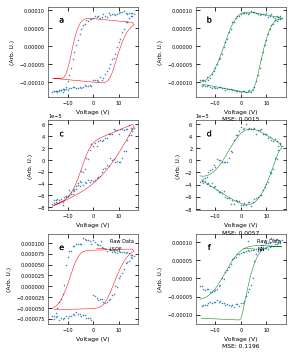

In [26]:
n = 1

data = ("LSQF", "NN")

fig = BE_viz.hysteresis_comparison(
    data,
    model=model,
    filename="Figure_XX_LSQF_NN_bmw_comparison",
)

In [27]:
axes = fig.axes

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
./Figures/Figure_XX_Violin.png
./Figures/Figure_XX_Violin.svg


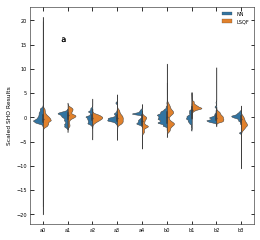

In [28]:
data, voltage = dataset.get_hysteresis(scaled=True, loop_interpolated = True)

fig = BE_viz.violin_plot_comparison_hysteresis(model,
                                         torch.atleast_3d(torch.tensor(data.reshape(-1, 96))),
                                         filename="Figure_XX_Violin") 

In [29]:
axes.extend(fig.axes)

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values
./Figures/Figure_XX_NN_Hysteresis_Maps.png
./Figures/Figure_XX_NN_Hysteresis_Maps.svg


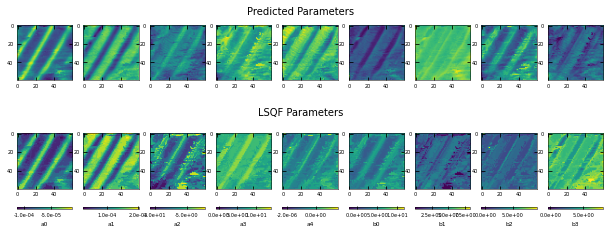

In [30]:
data, voltage = dataset.get_hysteresis(scaled=True, loop_interpolated = True)
data = torch.atleast_3d(torch.tensor(data.reshape(-1, 96)))

pred_recon, pred_params_scaled, pred_params = model.predict(
    data,
    1024,
    translate_params=False,
    is_SHO=False
)

fig = BE_viz.hysteresis_maps(pred_params, cycle=0, filename="Figure_XX_NN_Hysteresis_Maps")

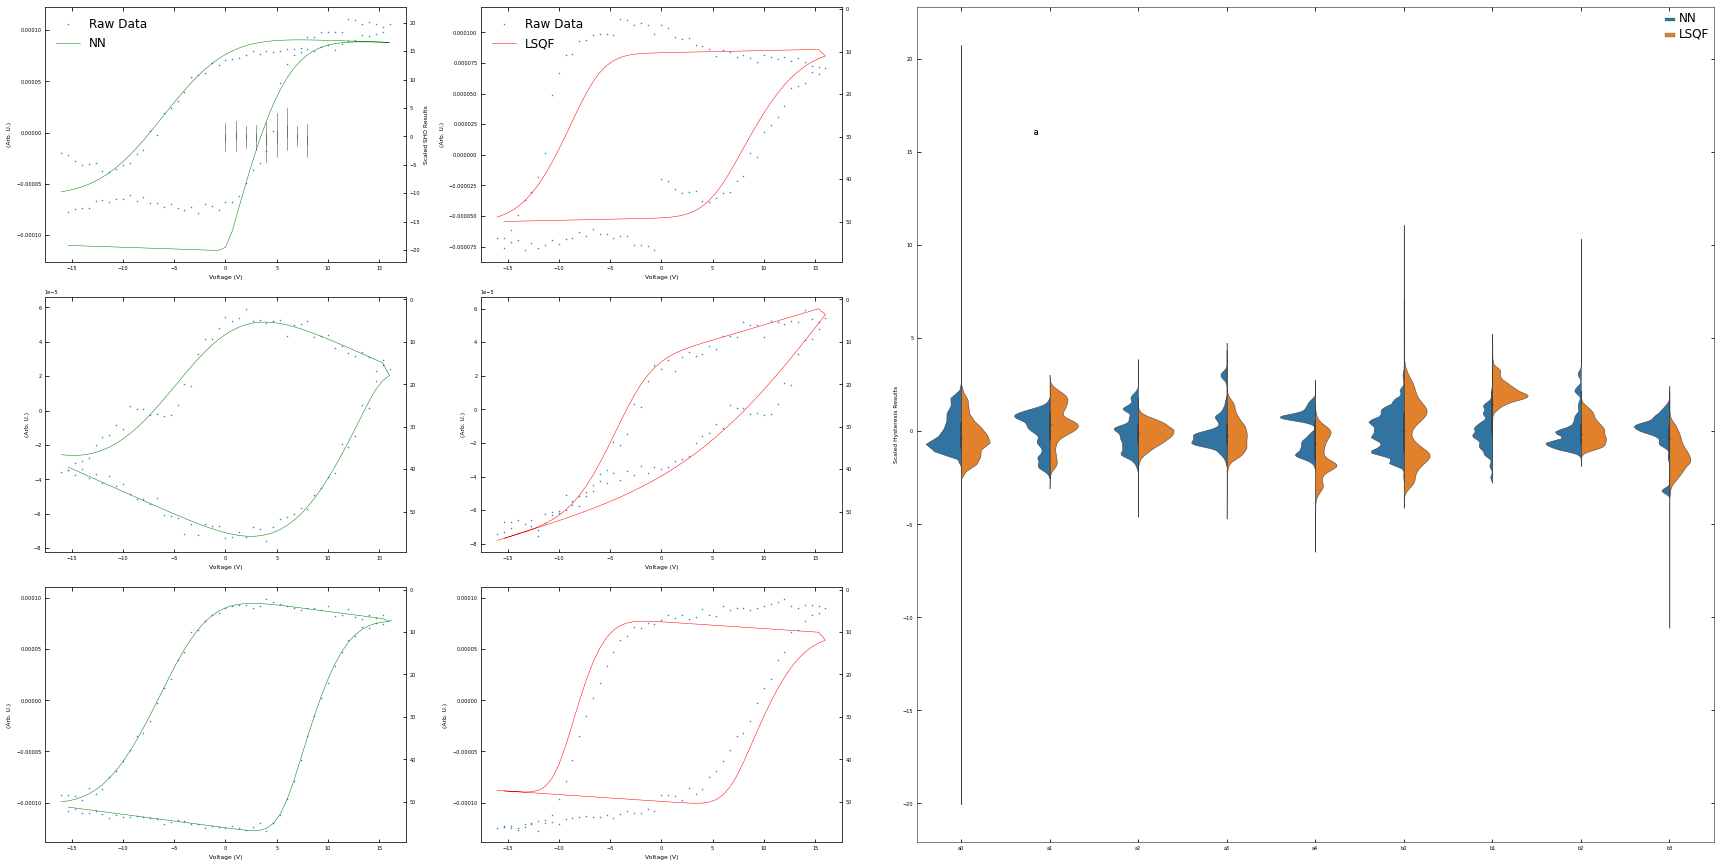

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data_SHO_Fit/Raw_Data-SHO_Fit_000/Spectroscopic_Values


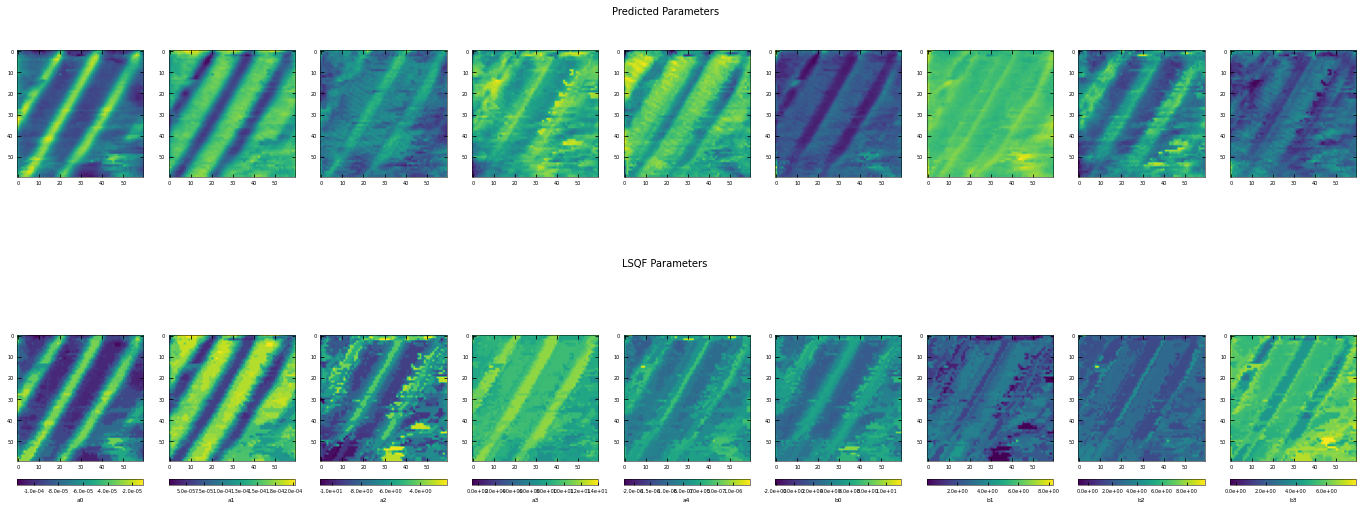

In [34]:
import pandas as pd
import seaborn as sns
import itertools

def copy_axes_properties(source_ax, target_ax, secondary_ax=None, type_ax=None):
    """Copy properties and data from source_ax to target_ax."""
    # Copy basic properties
    target_ax.set_xlabel(source_ax.get_xlabel())
    target_ax.set_ylabel(source_ax.get_ylabel())
    target_ax.set_xlim(source_ax.get_xlim())
    target_ax.set_ylim(source_ax.get_ylim())
    target_ax.set_title(source_ax.get_title())

    # Copy lines from the primary axis
    for line in source_ax.get_lines():
        label = line.get_label() if line.get_label() != '_nolegend_' else None
        # Copying line properties like color, linestyle, marker, etc.
        target_ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(),
                       linestyle=line.get_linestyle(), marker=line.get_marker(), label=label)

    # Handle twin axes if present
    if secondary_ax:
        ax_twin = target_ax.twinx()
        ax_twin.set_ylim(secondary_ax.get_ylim())
        ax_twin.set_ylabel(secondary_ax.get_ylabel())

        for line in secondary_ax.get_lines():
            label = line.get_label() if line.get_label() != '_nolegend_' else None
            # Copying line properties for the twin axis
            ax_twin.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(),
                         linestyle=line.get_linestyle(), marker=line.get_marker(), label=label)

    # Copy legends
    if source_ax.get_legend():
        target_ax.legend(fontsize='large')

    if secondary_ax and secondary_ax.get_legend():
        ax_twin.legend(fontsize='large')

# Create a figure
fig = plt.figure(figsize=(24, 24))

# Define the GridSpec layout
gs = GridSpec(6, 4, figure=fig)

order = [[0, 'twin', 6],
         [1, 'twin', 7],
         [2, 'twin', 8],
         [3, 'twin', 9],
         [4, 'twin', 10],
         [5, 'twin', 11],
         ['violin'],
        ]

# List of axes indices in GridSpec for each subplot
subplot_specs = [(0, 1, 0, 1), # a
                 (0, 1, 1, 2), # b
                 (1, 2, 0, 1), # c
                 (1, 2, 1, 2), # d
                 (2, 3, 0, 1), # e
                 (2, 3, 1, 2), # f
                 (0, 3, 2, 6), # g
                ]

# Create and set up subplots
for i, (r_start, r_end, c_start, c_end) in enumerate(subplot_specs):
    ax = fig.add_subplot(gs[r_start:r_end, c_start:c_end])
    if i < len(axes):
        idx = order[i]
        if idx[0] == 'violin':
            df = pd.DataFrame()

            # uses the model to get the predictions
            pred_data, scaled_param, params = model.predict(data, is_SHO=False)

            true = dataset.LSQF_hysteresis_params().reshape(-1, 9)

            true_scaled = dataset.loop_param_scaler.transform(true)

            # Builds the dataframe for the violin plot
            true_df = pd.DataFrame(
                true, columns=["a0", "a1", "a2", "a3", "a4",
                               "b0", "b1", "b2", "b3"]
            )
            predicted_df = pd.DataFrame(
                scaled_param, columns=["a0", "a1", "a2", "a3", "a4",
                                       "b0", "b1", "b2", "b3"]
            )

            # merges the two dataframes
            df = pd.concat((predicted_df, true_df))

            # adds the labels to the dataframe
            names = [true_scaled, scaled_param]
            names_str = ["NN", "LSQF"]
            labels = ["a0", "a1", "a2", "a3", "a4", "b0", "b1", "b2", "b3"]

            # adds the labels to the dataframe
            for j, name in enumerate(names):
                for i, label in enumerate(labels):
                    dict_ = {
                        "value": name[:, i],
                        "parameter": np.repeat(label, name.shape[0]),
                        "dataset": np.repeat(names_str[j], name.shape[0]),
                    }

                    df = pd.concat((df, pd.DataFrame(dict_)))

#             # builds the plot
#             fig, ax = plt.subplots(figsize=(4, 4))

            # plots the data
            sns.violinplot(
                data=df, x="parameter", y="value", hue="dataset", split=True, ax=ax
            )

            # labels the figure and does some styling
            labelfigs(ax, 0, style="b")
            ax.set_ylabel("Scaled Hysteresis Results")
            ax.set_xlabel("")

            # Get the legend associated with the plot
            legend = ax.get_legend()
            legend.set_title("")
            plt.setp(legend.get_texts(), fontsize='large') # Set the label size
        else:
            copy_axes_properties(axes[idx[0]], ax, axes[idx[2]], idx[1])
            

# Adjust the spacing between the plots as needed
plt.tight_layout()

# Show the layout
plt.show()

data, voltage = dataset.get_hysteresis(scaled=True, loop_interpolated = True)
data = torch.atleast_3d(torch.tensor(data.reshape(-1, 96)))

pred_recon, pred_params_scaled, pred_params = model.predict(
    data,
    1024,
    translate_params=False,
    is_SHO=False
)

fig = BE_viz.hysteresis_maps(pred_params, cycle=0);

# Set the figure size with 24 inches width
fig.set_size_inches(24, 10, forward=True)

# Show the layout
fig.show()

Figure 4. Piezoelectric hysteresis loops fitting results of DNN in comparison with LSQF method’s results. a,c,e Best, median, and worst predictions of LSQF method. b,d,f Best, median, and worst predictions of neural network trained with Trust Region CG. g Distributions of predicted parameters. h Color maps of the signal of parameters resulted from LSQF method. i Color maps of the signal of parameters resulted from neural network.

## Figure 5